# Redes Neuronales

## Concepto

<img src="NN_diagram.png" alt="Alt text" style="width: 700px;"/>

<img src="sh_typical_NN.png" alt="Alt text" style="width: 600px;"/>

Sup queremos hacer que una máquina entienda algo, como reconocer una foto de un gato. Una forma es escribir manualmente reglas, como buscar bigotes, una cola, dos orejas, etc. Pero este método tiene limitaciones, porque los gatos pueden verse muy diferentes de una foto a otra.

En lugar de escribir reglas manualmente, una red neuronal las aprende de los datos. A continuación una explicación simple:

1. **Neuronas**: En su núcleo, una red neuronal está compuesta por "neuronas". Estas son funciones matemáticas simples que reciben una entrada, la procesan y producen una salida.

2. **Capas**: Las neuronas están organizadas en capas:
   
   - **Capa de Entrada**: Aquí es donde nuestros datos (como una foto de un gato) entran en la red.
   - **Capas Ocultas**: Estas son capas intermedias. Procesan los datos de entrada, transformándolos a medida que pasan a través.
   - **Capa de Salida**: Esta produce la predicción final. Por ejemplo, en un clasificador de gatos contra perros, podría decir si la imagen de entrada es más probablemente de un gato o un perro.
   
3. **Conexiones**: Cada neurona en una capa está conectada a neuronas en la capa siguiente. Estas conexiones tienen **"pesos"**. Ajustar estos pesos cambia la salida de la red neuronal.

4. **Aprendizaje**: Cuando "entrenamos" una red neuronal, estamos ajustando estos pesos basados en los datos que tenemos. Mostramos a la red muchas fotos (por ejemplo, de gatos y perros), y trata de ajustar sus pesos para hacer predicciones precisas. Esto se hace típicamente usando un método llamado "retropropagación" y técnicas de optimización como el "descenso del gradiente".

5. **Funciones de Activación**: Después de que cada neurona procesa su entrada, utiliza una "función de activación" para decidir qué producir. Esta función introduce no linealidad, permitiendo que las redes neuronales capturen patrones complejos.

**Rol de los Pesos:**

1. Transformación Lineal: En el núcleo, una red neuronal aplica una serie de transformaciones a su entrada. La transformación más básica es una lineal, y los pesos son los factores por los cuales se multiplican las entradas.

2. Capturando Patrones: Los pesos permiten que la red se ajuste durante el entrenamiento. Ajustando estos pesos, la red "aprende" y se vuelve mejor para hacer predicciones o clasificaciones. El patrón y la estructura de los datos se capturan en los valores de estos pesos.

3. Propagación: La salida de una neurona, después de ser multiplicada por los pesos, sirve como entrada para las neuronas en la capa subsiguiente. Esta cadena de transformaciones lineales (a través de los pesos) seguida por activaciones no lineales permite que la red capture patrones complejos y relaciones.

Ejemplo:

Imagina que estás tratando de predecir el precio de una casa basado en dos características: el número de dormitorios y el tamaño de la casa (en pies cuadrados).

Si $x_1$ representa el número de dormitorios y $x_2$ representa el tamaño, una ecuación lineal simple para predecir el precio de la casa (antes de que se aplique cualquier función de activación) podría verse así:

precio_casa = $w_1 \times x_1 + w_2 \times x_2$

Aquí, $w_1$ y $w_2$ son los pesos. Determinan cuánta importancia le da la red neuronal al número de dormitorios y al tamaño de la casa, respectivamente.

Si, durante el entrenamiento, la red encuentra que el número de dormitorios es un factor muy importante para determinar el precio de la casa, $w_1$ podría aumentar. Por el contrario, si el tamaño de la casa no es tan crucial, $w_2$ podría ser menor.

* La suma $w_1 \times x_1 + w_2 \times x_2$: Esta es la suma ponderada combinada de las entradas. Es una combinación lineal de nuestras entradas, y es este valor el que se pasa a través de una función de activación para producir la salida de una neurona.

En esencia, los pesos dictan la influencia de las entradas en la salida de la red. Ajustando estos pesos a través del entrenamiento, la red refina sus predicciones para alinearse más estrechamente con los resultados reales que está tratando de aprender.

**Rol de la Función de Activación:**

1. Introducción de No-linealidad: Como se mencionó, este es el rol principal. Al pasar nuestra suma ponderada a través de una función no lineal, permitimos que nuestra red aprenda y represente relaciones no lineales.

2. Limitación de las Salidas: Algunas funciones de activación, como la sigmoide o tanh, comprimen sus entradas en un rango limitado. Esto puede ser particularmente útil si queremos nuestras salidas en un rango específico.

3. Toma de Decisiones: En tareas de clasificación, las funciones de activación pueden ayudar a tomar decisiones discretas. Por ejemplo, una función de activación sigmoide puede comprimir valores entre 0 y 1, los cuales pueden ser tratados como probabilidades en clasificación binaria.

Aplicando a nuestro Ejemplo de Precio de Viviendas:
Digamos que nuestra combinación lineal para el precio de la vivienda, basada en dormitorios y tamaño, es:

$z = w_1 \times x_1 + w_2 \times x_2$

Notar que los precios de las viviendas no pueden ser negativos, pero nuestra combinación lineal z podría serlo. Para asegurar que nuestras predicciones sean no negativas, podríamos elegir la ReLU (Unidad Lineal Rectificada) como nuestra función de activación. La función ReLU es:

$$f(z) = \max(0, z)$$

Esto significa que si $z$ es positivo, la función devuelve $z$ mismo, pero si $z$ es negativo, devuelve $0$.
Entonces, para nuestro precio de casa:
$ \text{precio\_casa} = f(w_1 \times x_1 + w_2 \times x_2) $

Con la activación ReLU, nuestro precio de casa predicho siempre será no negativo. Además, ReLU introduce no linealidad, permitiendo que la red capture relaciones más complejas entre el número de dormitorios, el tamaño de la casa y el precio real de la casa.

<img src="relu2.png" alt="Alt text" style="width: 400px;"/>

<img src="tanh_plot.png" alt="Alt text" style="width: 400px;"/>

<img src="sigmoid.png" alt="Alt text" style="width: 400px;"/>

## **Propagación en una Red Neuronal**

La propagación en una red neuronal ocurre en dos fases principales:

1. Propagación hacia adelante
2. Propagación hacia atrás (o Retropropagación - Back propagation)



### 1. Propagación hacia adelante:

Este es el proceso de pasar una entrada a través de la red para obtener una salida.

**1.1. Capa de Entrada:** Comenzamos con los datos de entrada (por ejemplo, características de una casa en nuestro ejemplo anterior).
  
**1.2. Suma Ponderada:** Para cada neurona en la primera capa oculta, se calcula la suma ponderada de los datos de entrada. Esto es un producto punto de los datos de entrada y los pesos que conectan la capa de entrada con la neurona actual.
$ z = w \cdot x + b $

donde $ w $ es el vector de pesos, $ x $ es el vector de entrada, y $ b $ es un término de sesgo (bias term).


**1.3. Activación:** Pasamos esta suma ponderada a través de una función de activación (por ejemplo, ReLU, sigmoide, tanh).

$ a = f(z) $

**1.4. Repetir:** Los pasos 1.2 y 1.3 para cada capa siguiente de la red hasta que se alcance la capa de salida.

Al final de la propagación hacia adelante, tendrá una salida (o un conjunto de salidas) para sus datos de entrada.

### 2. Propagación hacia atrás (Backpropagation):

Aquí es donde ocurre el aprendizaje. Es el proceso de ajustar los pesos de la red en respuesta al error en sus predicciones. El objetivo es minimizar este error.

**2.1. Calcular Error:** Comienza calculando la diferencia entre la salida predicha (de la propagación hacia adelante) y los valores objetivo reales. Esta diferencia suele definirse como una pérdida o coste $ J $, que buscamos minimizar.

**2.2. Cálculo del Gradiente:** Se calcula el gradiente de la pérdida con respecto a cada peso en la red. Esto implica aplicar la regla de la cadena del cálculo. El gradiente nos indica la dirección y la tasa de cambio de nuestra pérdida con respecto a cada peso.

**2.3. Actualizar Pesos:** Se ajustan los pesos en la dirección que disminuya la pérdida. Esto se hace típicamente usando algoritmos de optimización como el Descenso del Gradiente. La idea básica es:

$$w_{nuevo} = w_{anterior} - \alpha \frac{\partial J}{\partial w_{anterior}}$$

donde $ \alpha $ es la tasa de aprendizaje, y $ \frac{\partial J}{\partial w} $ es el gradiente de la pérdida con respecto al peso $ w $.

**2.4. Repetir:** Este proceso se repite varias veces (a menudo llamadas épocas o epochs) hasta que la función de pérdida (costo) converge a un valor mínimo.

<img src="backprop.png" alt="Alt text" style="width: 800px;"/>

In [1]:
!python --version

Python 3.11.9


In [ ]:
#!pip install tensorflow
#!pip install tensorflow==2.17.0

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [3]:
tf.__version__

'2.17.0'

### 1. Importando el dataset y preprocesamiento de información

In [4]:
dataset = pd.read_csv('Attrition.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
len(dataset)

10000

In [5]:
dataset.Geography.value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [8]:
X = dataset.iloc[:, 3:-1].values #desde col 3 hasta penúltima
y = dataset.iloc[:, -1].values

In [11]:
X

array([[619, 'France', 0, ..., 1, 1, 101348.88],
       [608, 'Spain', 0, ..., 0, 1, 112542.58],
       [502, 'France', 0, ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 0, ..., 0, 1, 42085.58],
       [772, 'Germany', 1, ..., 1, 0, 92888.52],
       [792, 'France', 0, ..., 1, 0, 38190.78]], dtype=object)

### Aplicando un encoding a los datos categóricos

In [9]:
from sklearn.preprocessing import LabelEncoder #codificar las etiquetas
le = LabelEncoder()
X[:,2] = le.fit_transform(X[:,2]) #porque gender tiene índice 2

One Hot Encoding sobre columna "Geography"

#one-hot encoding:
France | Germany | Spain
1          0         0       #para Francia
0          1         0       #para Germany

In [12]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [1])], remainder = 'passthrough') #porque Geography (el país) tiene indice 1
X = np.array(ct.fit_transform(X))

1. `ColumnTransformer` es una clase dentro de `sklearn.compose`, permite aplicar diferentes transformaciones a diferentes columnas. 
2. El parámetro `transformers` es una lista de tuplas donde cada tupla especifica una transformación. Cada tupla contiene 3 elementos:
nombre, el objeto transformer - en este caso `OneHotEncoder`-, la lista con los índices de las columnas a transformar.
5. `remainder='passthrough'` indica que sólo pase las demás variables sin transformarlas

In [13]:
X[0] #COMO QUEDÓ el primer renglón de X

array([1.0, 0.0, 0.0, 619, 0, 42, 2, 0.0, 1, 1, 1, 101348.88],
      dtype=object)

In [14]:
print(X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


### Splitting entrenamiento y prueba

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.25, random_state = 42)

In [15]:
pd.Series(y).value_counts(normalize=True)

0    0.7963
1    0.2037
Name: proportion, dtype: float64

In [17]:
pd.Series(y_test).value_counts(normalize=True)

0    0.7964
1    0.2036
Name: proportion, dtype: float64

### Feature Scaling  : es importante sobre todo para el Deep Learning

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## 2 - Construyendo la Red

### Inicializando la Red

In [19]:
ann = tf.keras.models.Sequential() #la clase Sequential del modulo 'models' de la librería 'keras'

# esto sólo le dice que haga una red secuencial

### Agregando la capa de inputs y la primera capa oculta

In [20]:
ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu')) #usando Dense para definir una red totalmente conectada

### Agregando una segunda capa oculta

In [21]:
ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))

### Output layer

In [22]:
ann.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [ ]:
# Si por ejemplo tuviéramos 5 categorías en la variable respuesta, se puede modelar de la siguiente forma y entrenar un modelo para c/u.
# 'OvR': one vs rest  i.e. Topic Allocation 
y1|y2|y3|y4|y5
1  0  0  0   0
0  0  0  0   1

## 3 -  Entrenamiento de la Red Neuronal

### Compilando: se define el setup del entrenamiento

In [23]:
ann.compile(optimizer= 'adam', loss = 'binary_crossentropy', metrics = ['recall'])

#adam utiliza stochastic gradient descent
# cuando hacemos clasificación binaria, la loss function tiene que ser 'binary_crossentropy'.
# si más de 2 categorías a clasificar 'categorical_crossentropy'

### Entrenamiento de la Red Neuronal

In [24]:
X_train.shape

(7500, 12)

In [25]:
# observaciones
7500/32

234.375

In [26]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 200)

Epoch 1/200
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 258us/step - loss: 0.6798 - recall: 0.2649    
Epoch 2/200
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 215us/step - loss: 0.4728 - recall: 0.0448  
Epoch 3/200
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 211us/step - loss: 0.4454 - recall: 0.2052  
Epoch 4/200
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 213us/step - loss: 0.4289 - recall: 0.2513
Epoch 5/200
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 213us/step - loss: 0.4183 - recall: 0.2879  
Epoch 6/200
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 214us/step - loss: 0.4007 - recall: 0.3114
Epoch 7/200
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 220us/step - loss: 0.3890 - recall: 0.3464
Epoch 8/200
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 228us/step - loss: 0.3951 - recall: 0.3585
Epoch 9/200
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 230us/step - loss: 0.3806 - recall: 0.4040
Epoch 10/200
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 232us/step - loss: 0.3688 - recall: 0.4098
Epoch 11/200
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 230us/step - loss: 0.3586 - recall: 0.4143
Epoch 12/200
235/235 ━━━━━━━━━━

## 4 - Predicciones

### Predicciones sobre el conjunto de test

In [29]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.41)

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 263us/step


### Matriz de Confusión

In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=2))

[[1875  116]
 [ 228  281]]
0.8624
              precision    recall  f1-score   support

           0       0.89      0.94      0.92      1991
           1       0.71      0.55      0.62       509

    accuracy                           0.86      2500
   macro avg       0.80      0.75      0.77      2500
weighted avg       0.85      0.86      0.86      2500



#### Utilizando SMOTE para ver si podemos mejorar el Recall

In [38]:
from collections import Counter
from imblearn.over_sampling import SMOTE

#Aplicando SMOTE:
smote = SMOTE(random_state=42, sampling_strategy = 2/3)
X_smt, y_smt = smote.fit_resample(X_train, y_train)

ann.compile(optimizer= 'adam', loss = 'binary_crossentropy', metrics = ['recall'])
ann.fit(X_smt, y_smt, batch_size=32, epochs = 200)

Epoch 1/200
312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 238us/step - loss: 0.4239 - recall: 0.7232
Epoch 2/200
312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 213us/step - loss: 0.4213 - recall: 0.6951
Epoch 3/200
312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 220us/step - loss: 0.4210 - recall: 0.6915
Epoch 4/200
312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 221us/step - loss: 0.4186 - recall: 0.7075
Epoch 5/200
312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 219us/step - loss: 0.4136 - recall: 0.6767
Epoch 6/200
312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 215us/step - loss: 0.4165 - recall: 0.7071
Epoch 7/200
312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 219us/step - loss: 0.4233 - recall: 0.6912
Epoch 8/200
312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 231us/step - loss: 0.4258 - recall: 0.6944
Epoch 9/200
312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 229us/step - loss: 0.4253 - recall: 0.6706
Epoch 10/200
312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 214us/step - loss: 0.4199 - recall: 0.6947
Epoch 11/200
312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 214us/step - loss: 0.4185 - recall: 0.6985
Epoch 12/200
312/312 ━━━━━━━━━━━━━━━━━━━━

In [39]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.55) #pueden usar 0.5 con punto de corte, el 0.55 lo obtuve probando distintos escenarios
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred, digits=2))

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 283us/step
[[1764  227]
 [ 174  335]]
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1991
           1       0.60      0.66      0.63       509

    accuracy                           0.84      2500
   macro avg       0.75      0.77      0.76      2500
weighted avg       0.85      0.84      0.84      2500



### Ejemplo de una ANN para un problema de regresión

Epoch 1
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step - loss: 2.5722
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


/opt/anaconda3/envs/diplomado_cdd/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


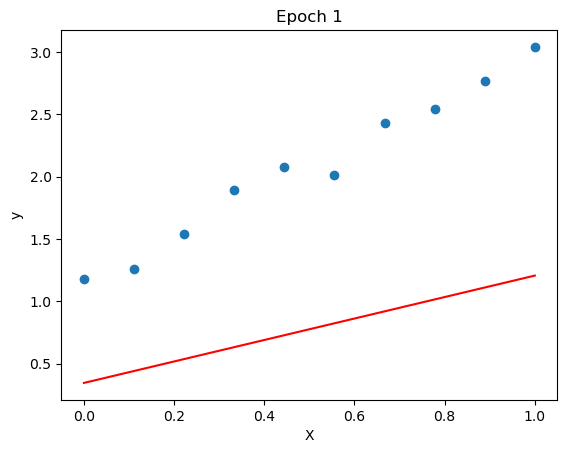

Epoch 2
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4083
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


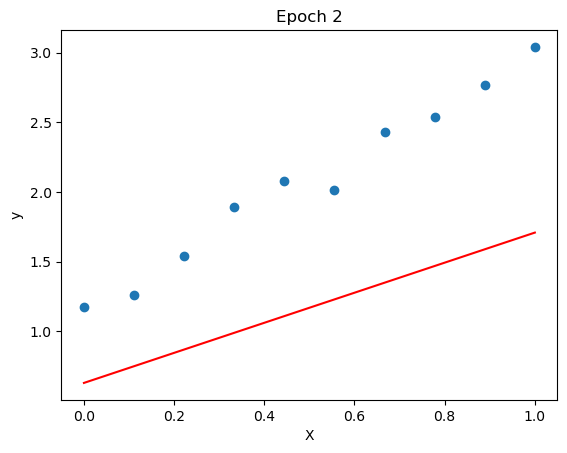

Epoch 3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8561 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


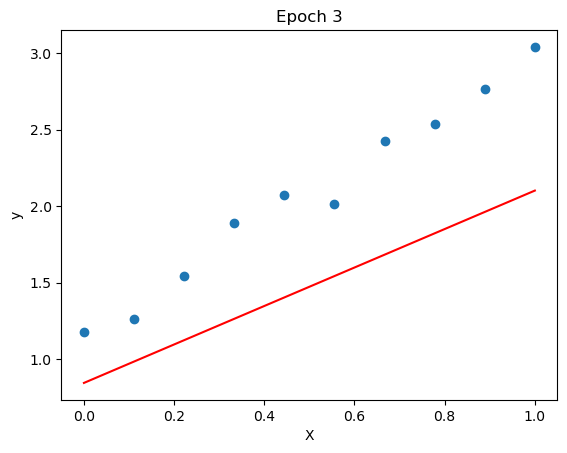

Epoch 4
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 511us/step - loss: 0.3383
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


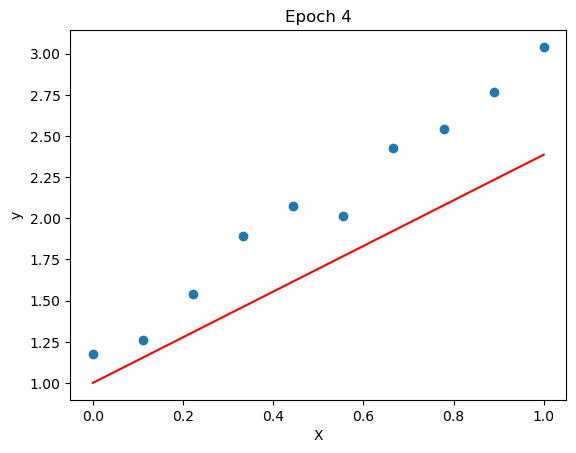

Epoch 5
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 506us/step - loss: 0.1816
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


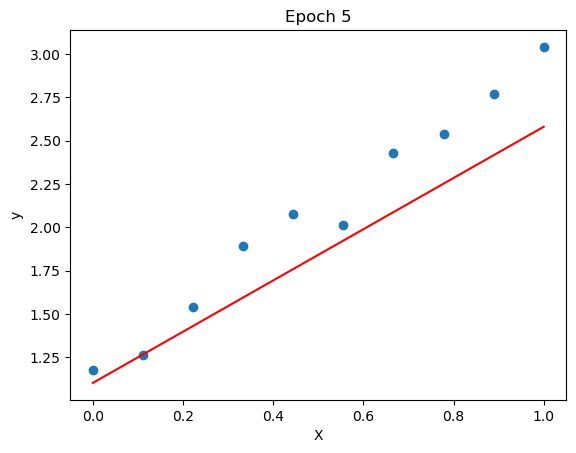

Epoch 6
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 543us/step - loss: 0.0672
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


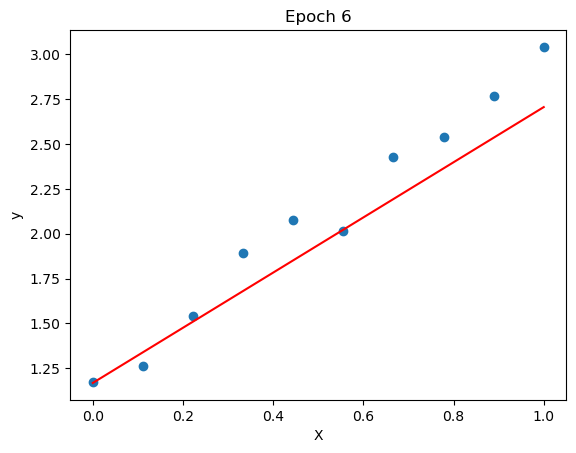

Epoch 7
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 562us/step - loss: 0.0381
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


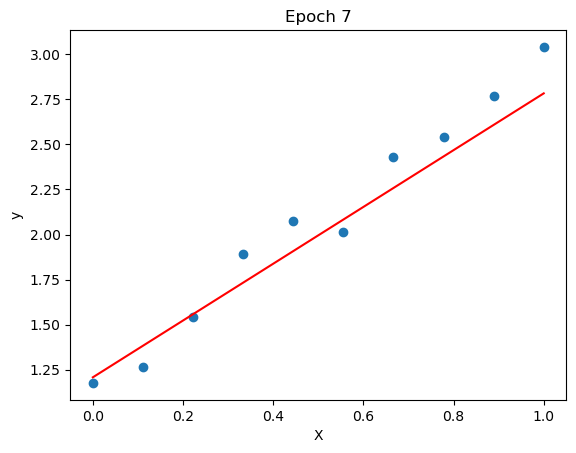

Epoch 8
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 501us/step - loss: 0.0206
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


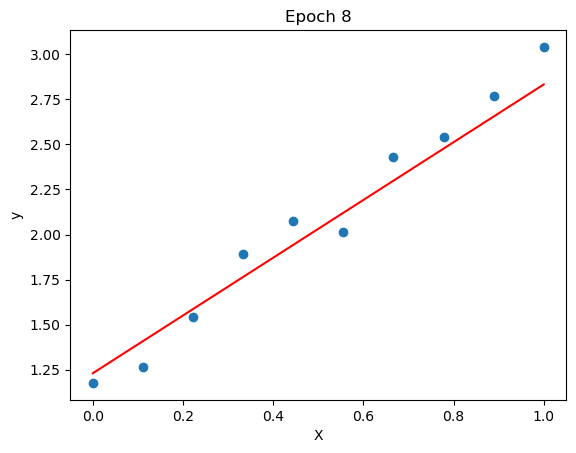

Epoch 9
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step - loss: 0.0193
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


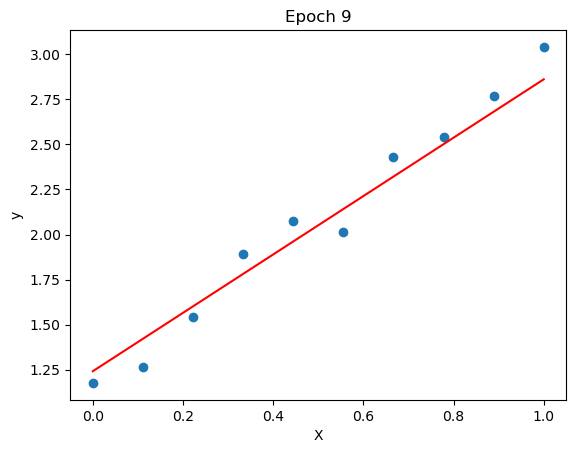

Epoch 10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step - loss: 0.0116
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


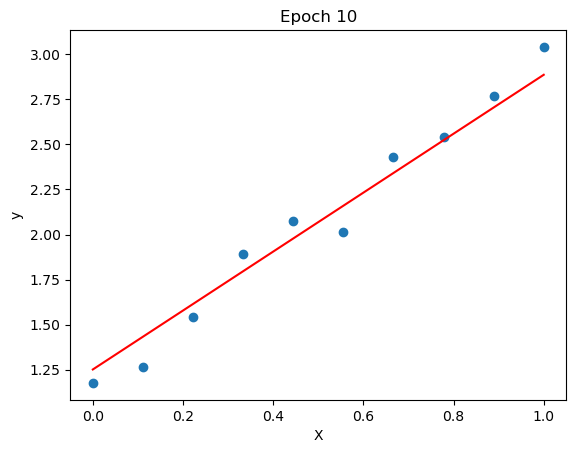

Epoch 11
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 570us/step - loss: 0.0113
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


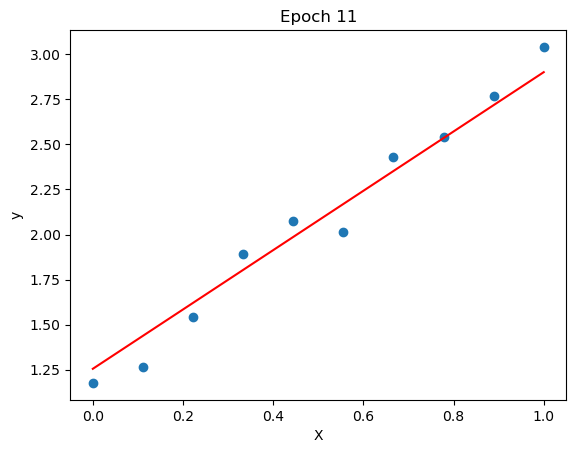

Epoch 12
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step - loss: 0.0104
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


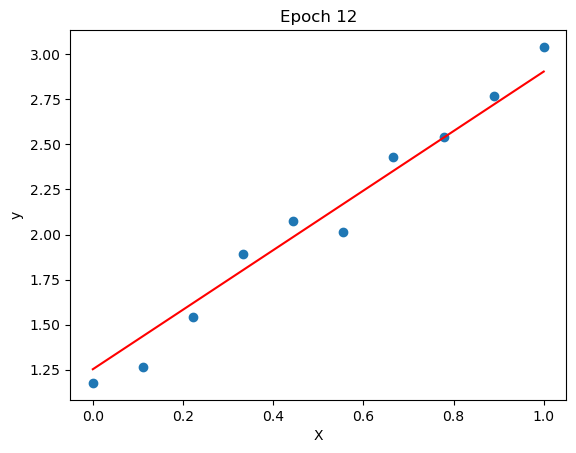

Epoch 13
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step - loss: 0.0110
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


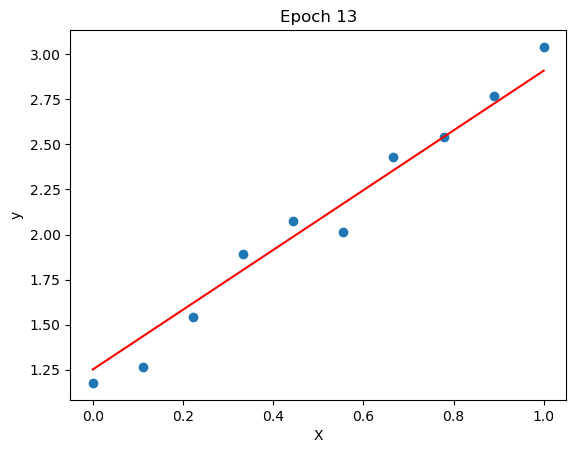

Epoch 14
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 336us/step - loss: 0.0100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


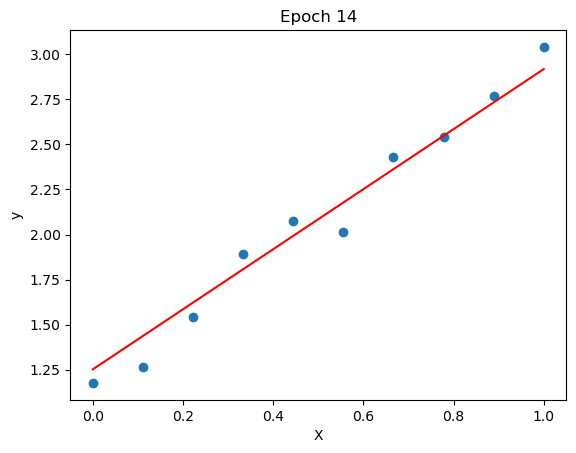

Epoch 15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step - loss: 0.0116
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


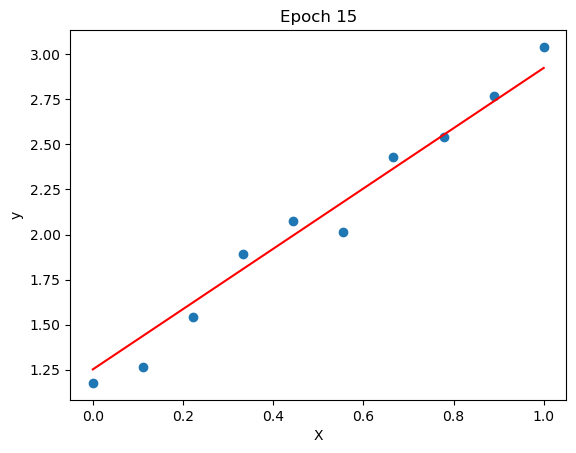

Epoch 16
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step - loss: 0.0123
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


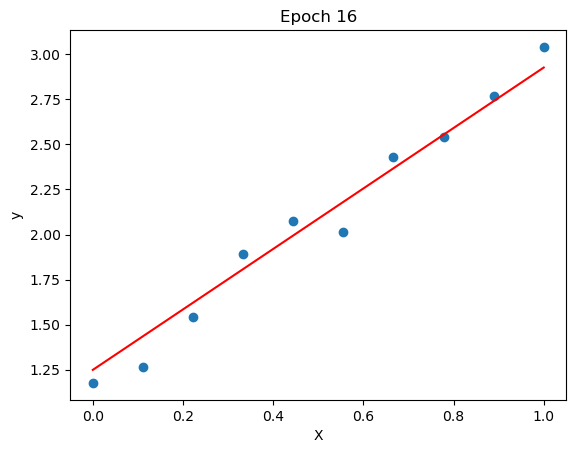

Epoch 17
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 584us/step - loss: 0.0083
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


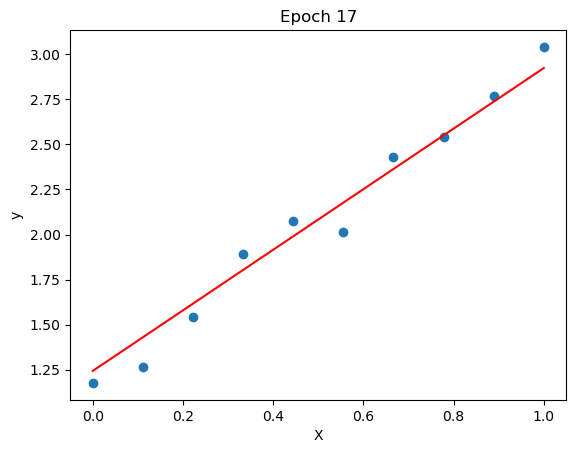

Epoch 18
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step - loss: 0.0101
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


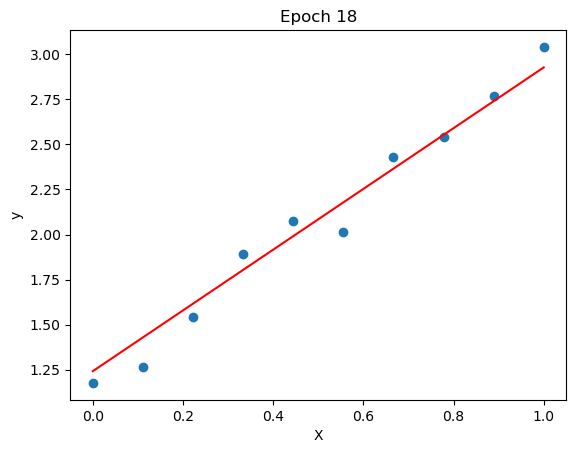

Epoch 19
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step - loss: 0.0127
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


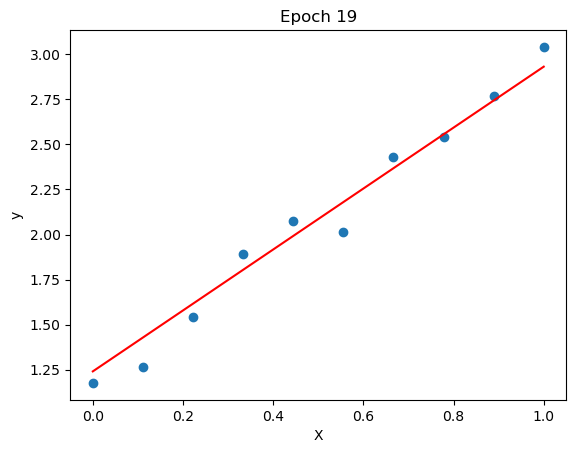

Epoch 20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step - loss: 0.0103
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


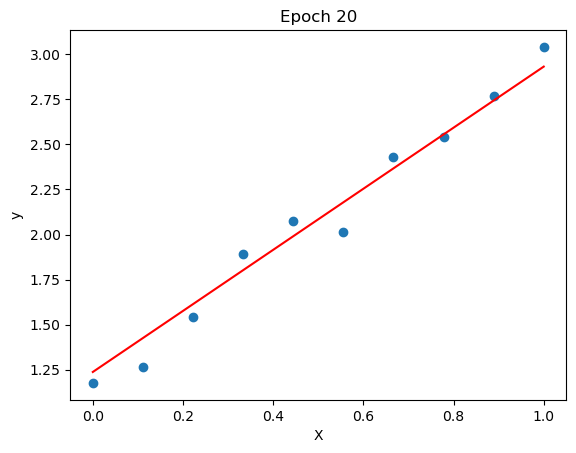

Epoch 21
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 489us/step - loss: 0.0149
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


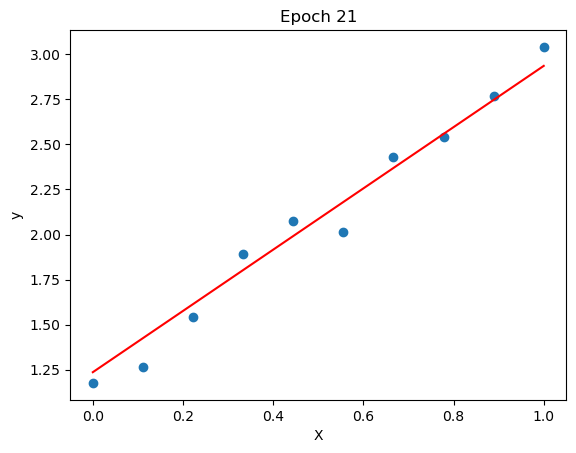

Epoch 22
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step - loss: 0.0073
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


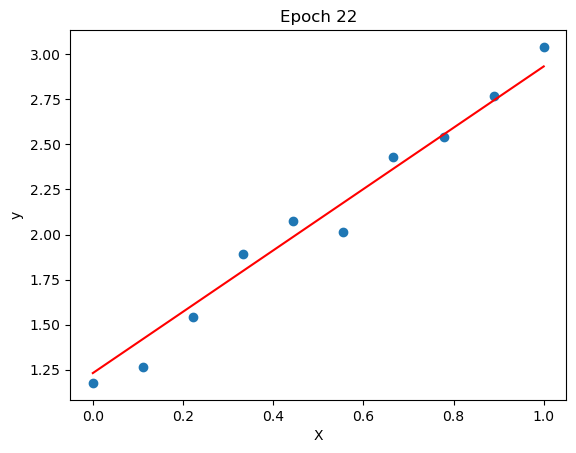

Epoch 23
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step - loss: 0.0087
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


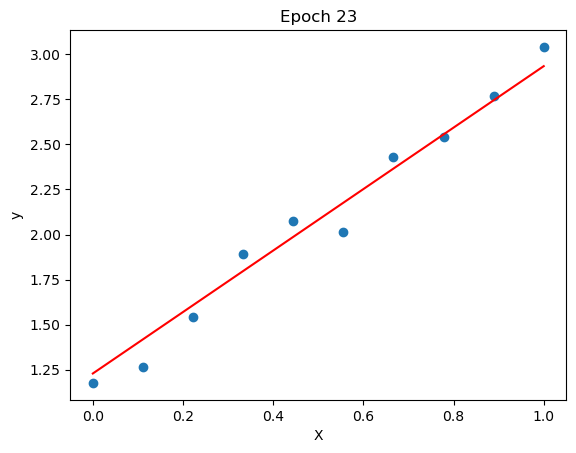

Epoch 24
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 325us/step - loss: 0.0069
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


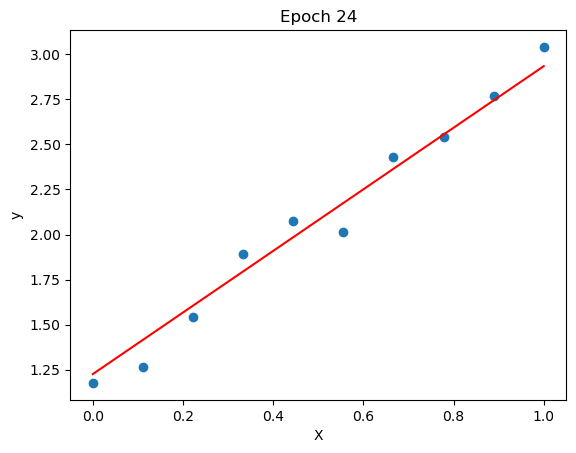

Epoch 25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 339us/step - loss: 0.0078
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


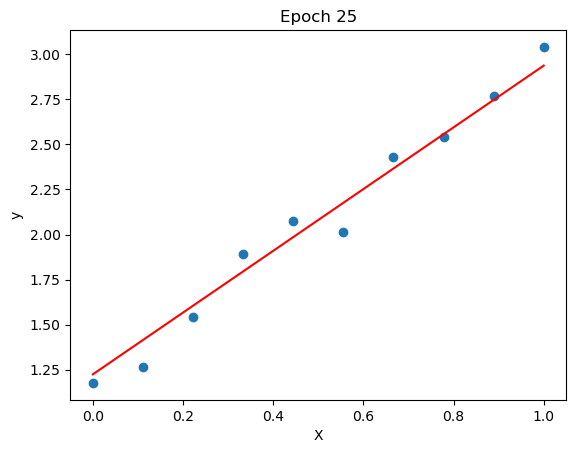

Epoch 26
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step - loss: 0.0091
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


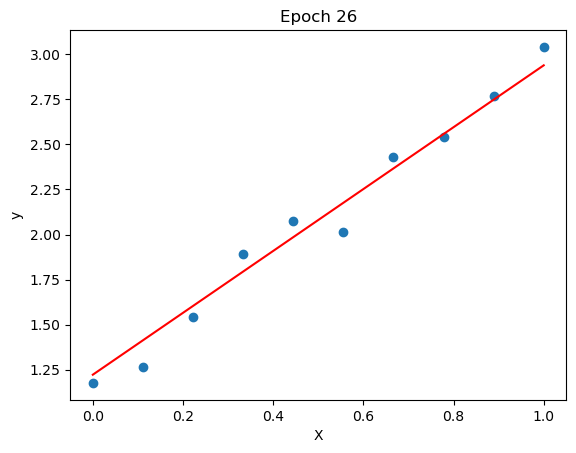

Epoch 27
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 324us/step - loss: 0.0080
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


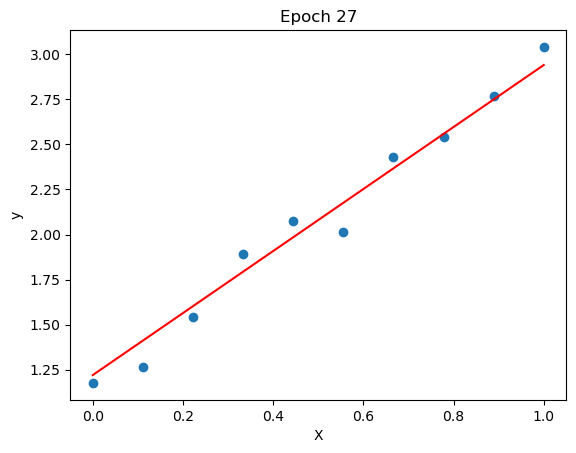

Epoch 28
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step - loss: 0.0082
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


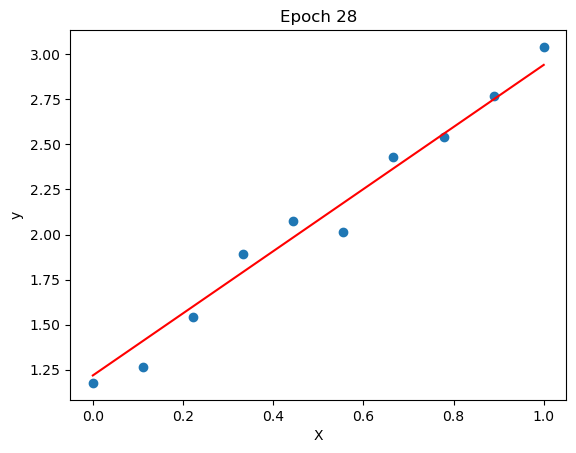

Epoch 29
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step - loss: 0.0066
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


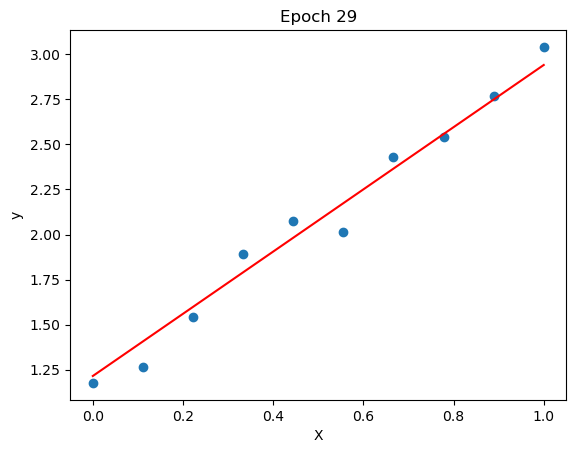

Epoch 30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step - loss: 0.0082
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


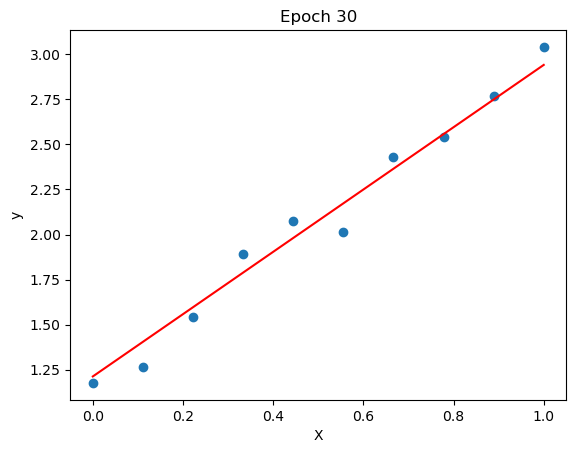

Epoch 31
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step - loss: 0.0090
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


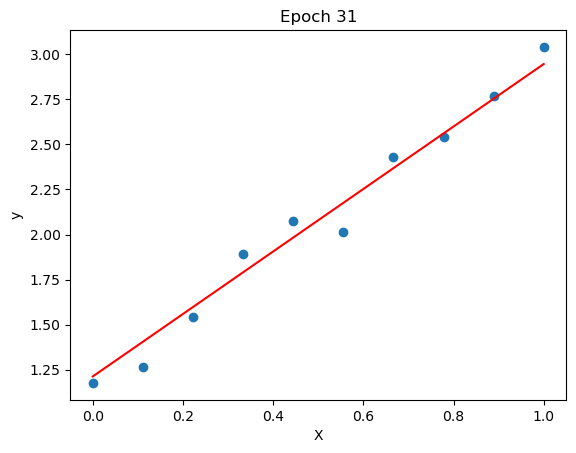

Epoch 32
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step - loss: 0.0067
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


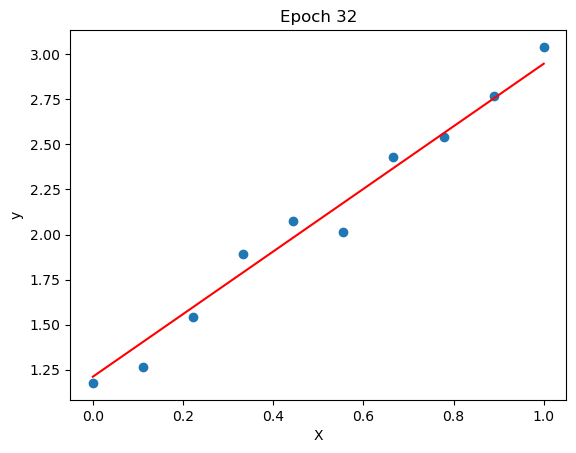

Epoch 33
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step - loss: 0.0101
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


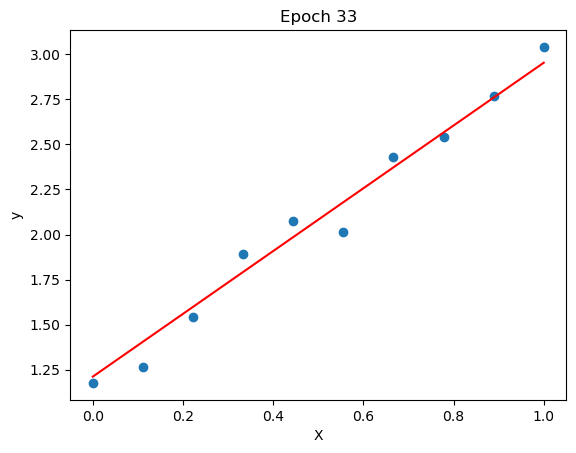

Epoch 34
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step - loss: 0.0082
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


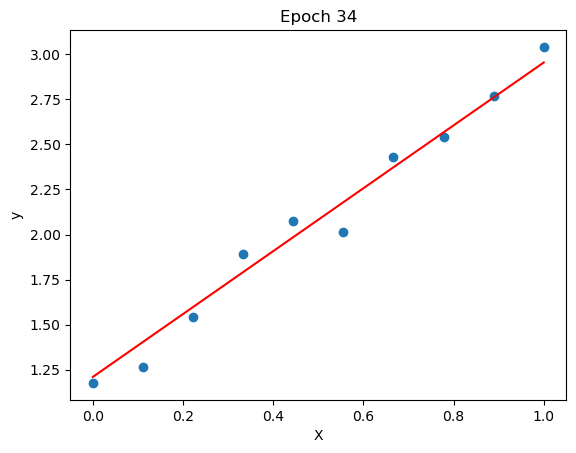

Epoch 35
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step - loss: 0.0060
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


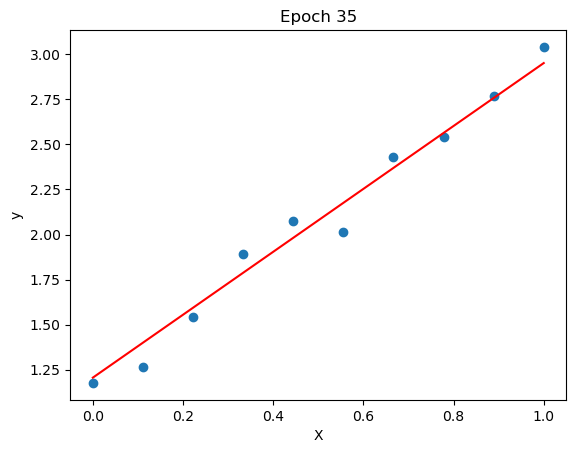

Epoch 36
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 318us/step - loss: 0.0065
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


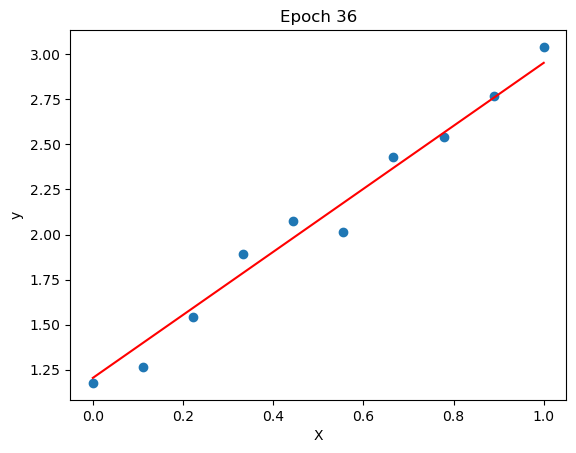

Epoch 37
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 331us/step - loss: 0.0118
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


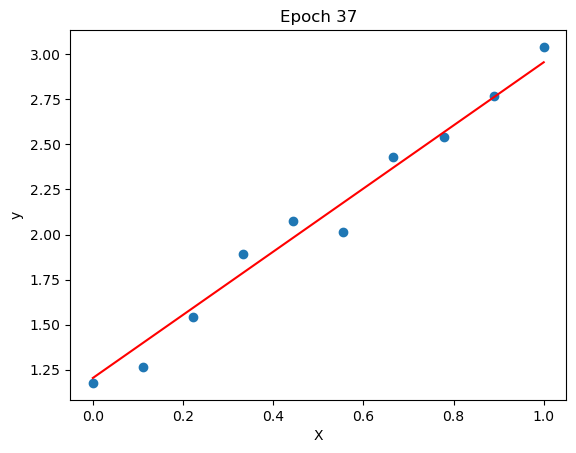

Epoch 38
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 324us/step - loss: 0.0068
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


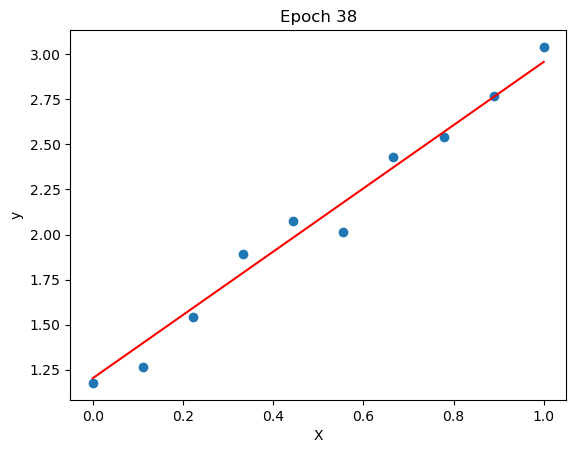

Epoch 39
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 513us/step - loss: 0.0103
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


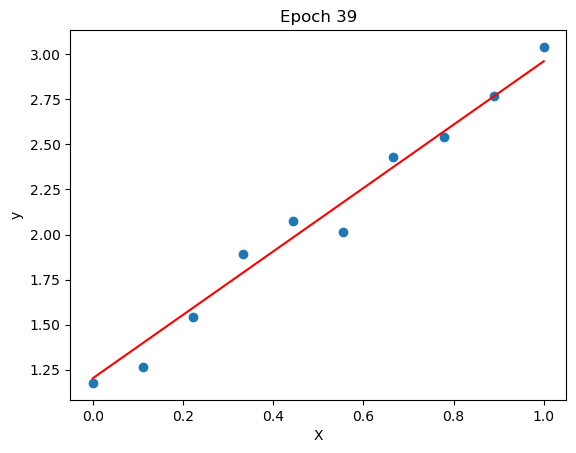

Epoch 40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step - loss: 0.0096
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


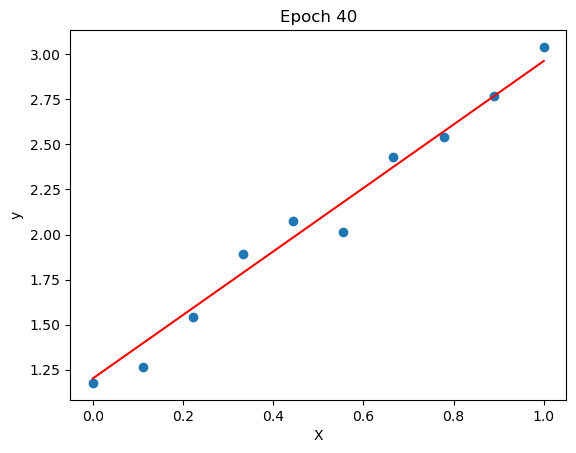

Epoch 41
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step - loss: 0.0090
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


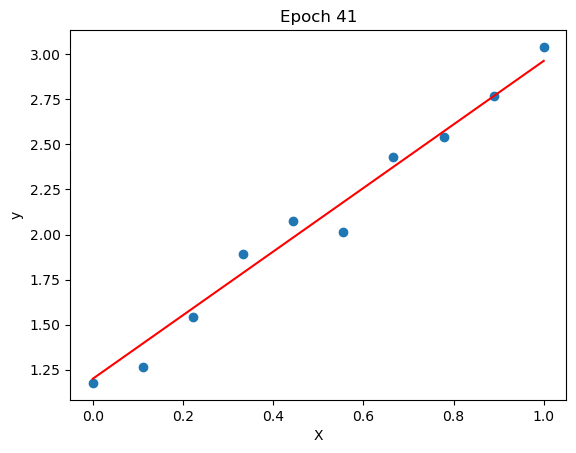

Epoch 42
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step - loss: 0.0058  
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


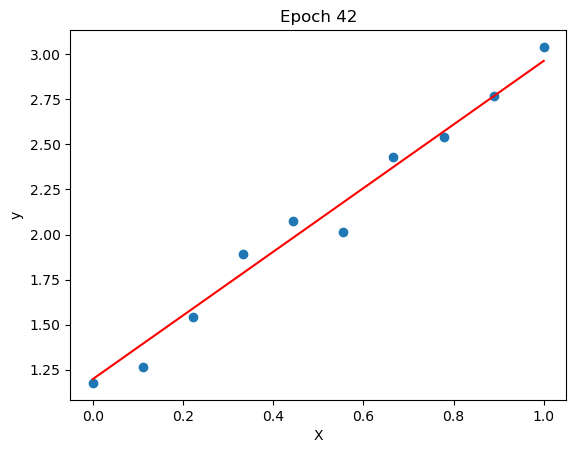

Epoch 43
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step - loss: 0.0099
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


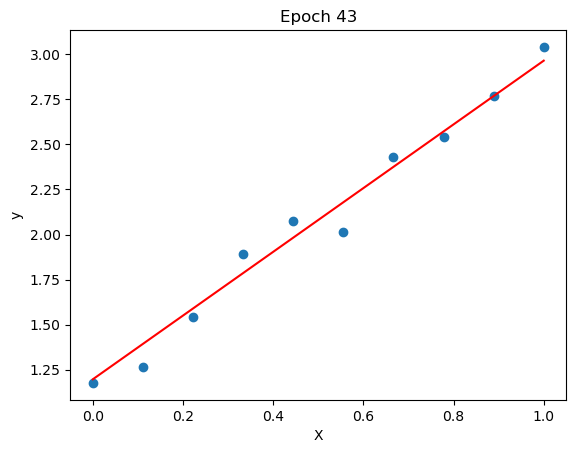

Epoch 44
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step - loss: 0.0064
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


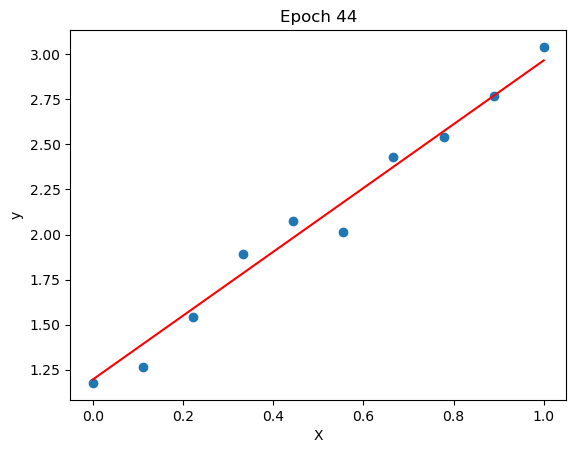

Epoch 45
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step - loss: 0.0082
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


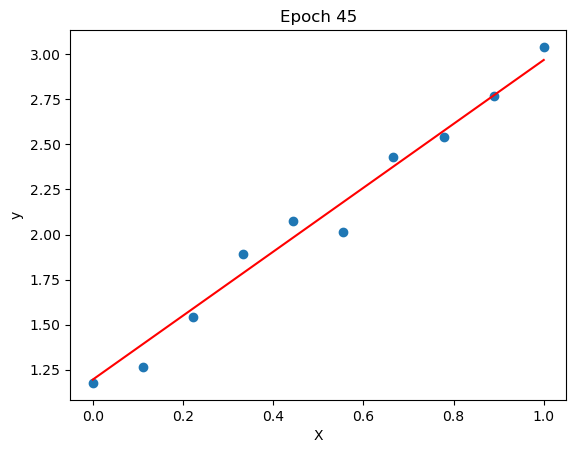

Epoch 46
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step - loss: 0.0084
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


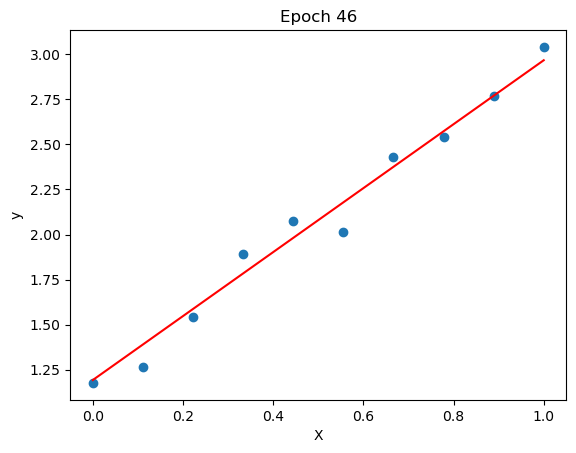

Epoch 47
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 337us/step - loss: 0.0077
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


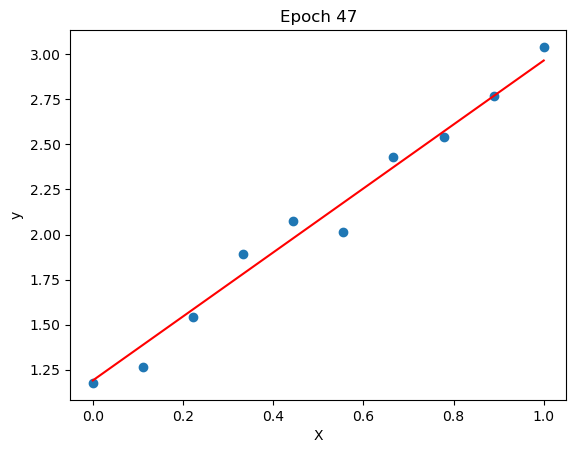

Epoch 48
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 330us/step - loss: 0.0072
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


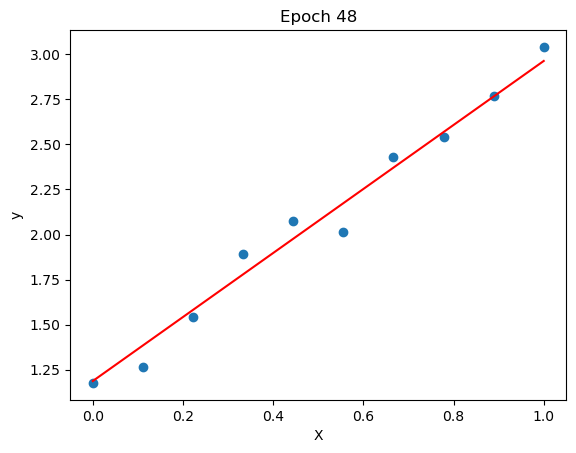

Epoch 49
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step - loss: 0.0076  
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


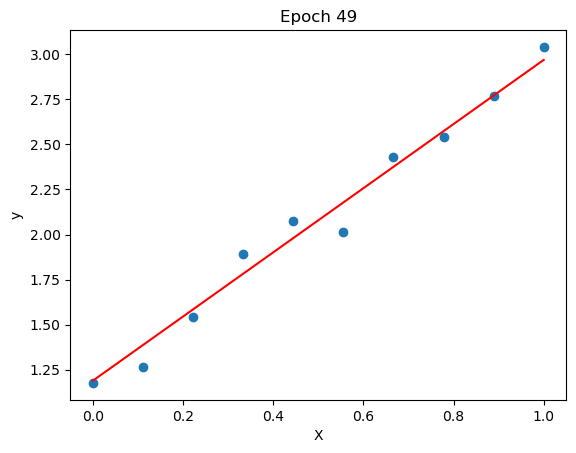

Epoch 50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 341us/step - loss: 0.0074
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


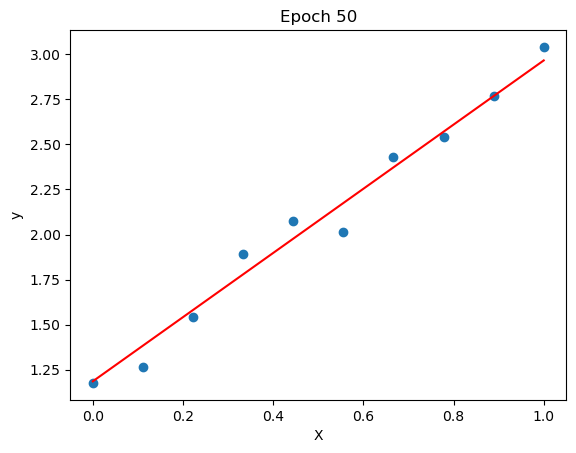

Epoch 51
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 332us/step - loss: 0.0060
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


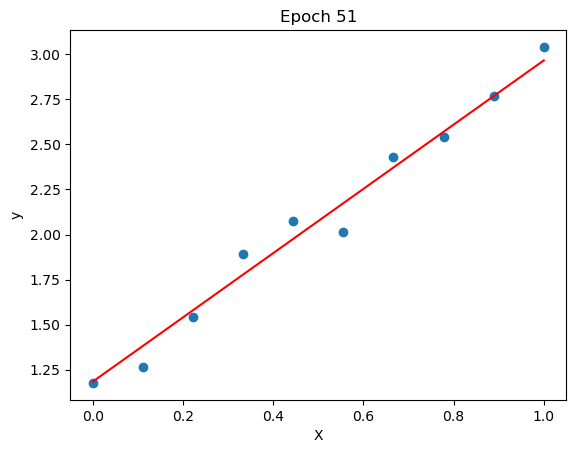

Epoch 52
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 336us/step - loss: 0.0065
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


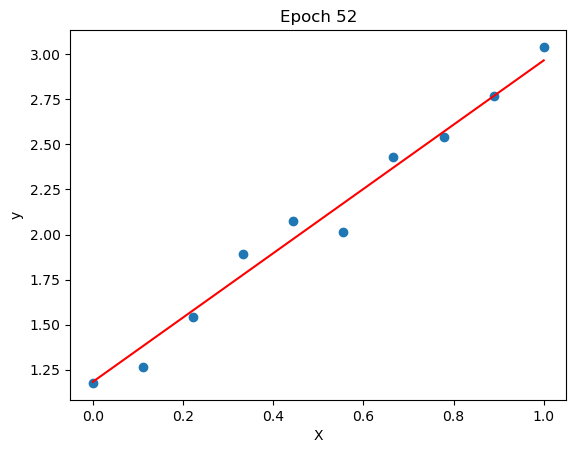

Epoch 53
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step - loss: 0.0085
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


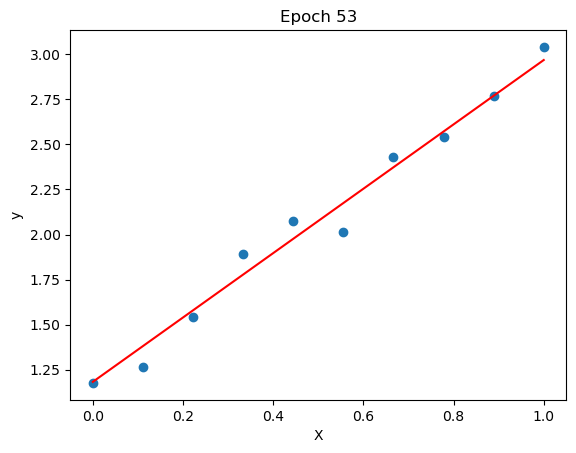

Epoch 54
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 315us/step - loss: 0.0087
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


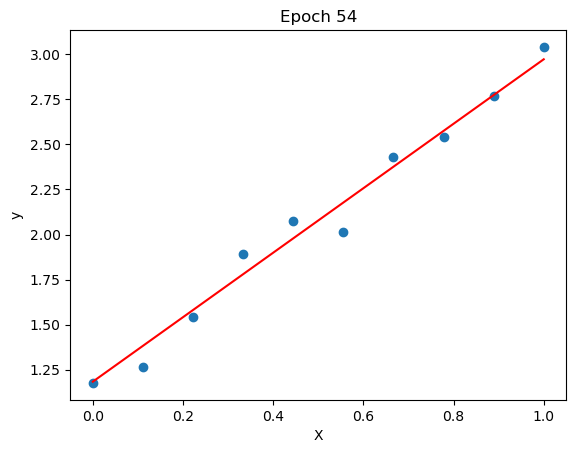

Epoch 55
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 331us/step - loss: 0.0084
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


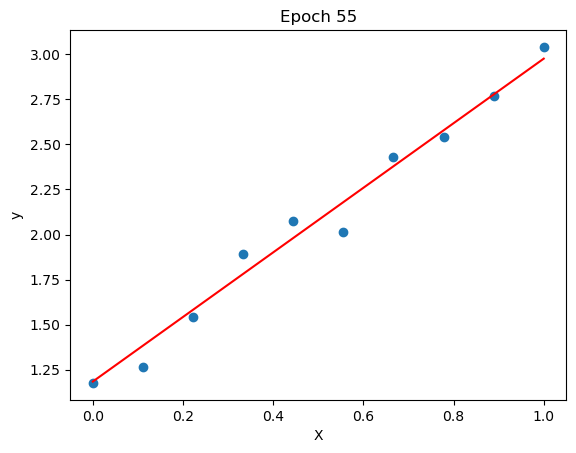

Epoch 56
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - loss: 0.0061
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


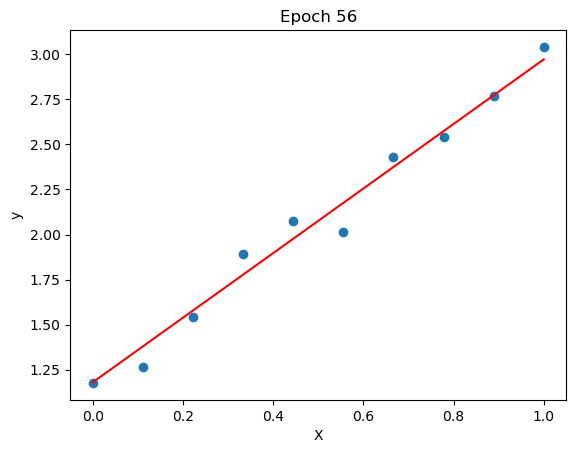

Epoch 57
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 331us/step - loss: 0.0070
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


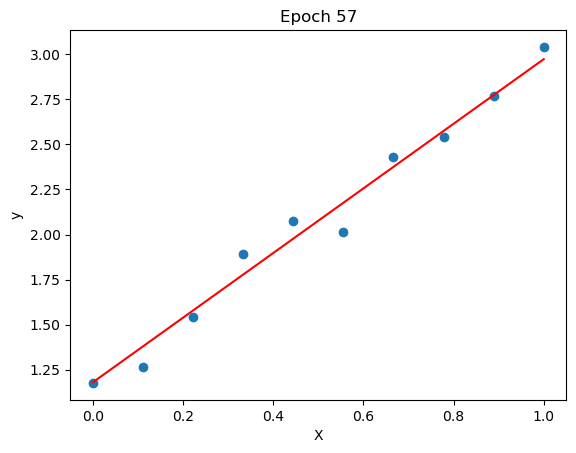

Epoch 58
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 326us/step - loss: 0.0093
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


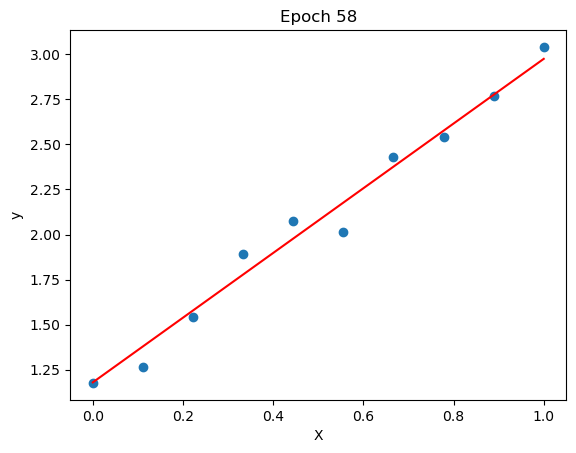

Epoch 59
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 341us/step - loss: 0.0110
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


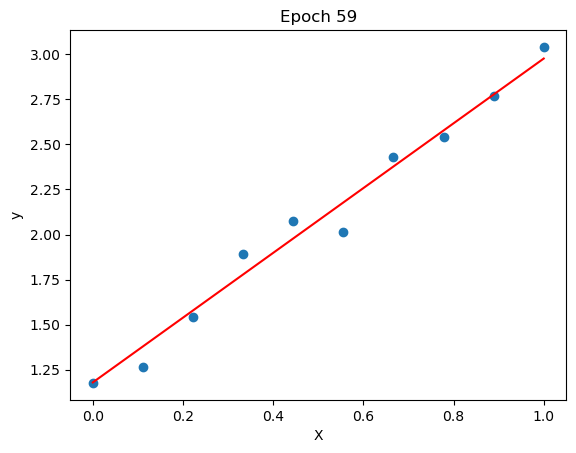

Epoch 60
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 334us/step - loss: 0.0095
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


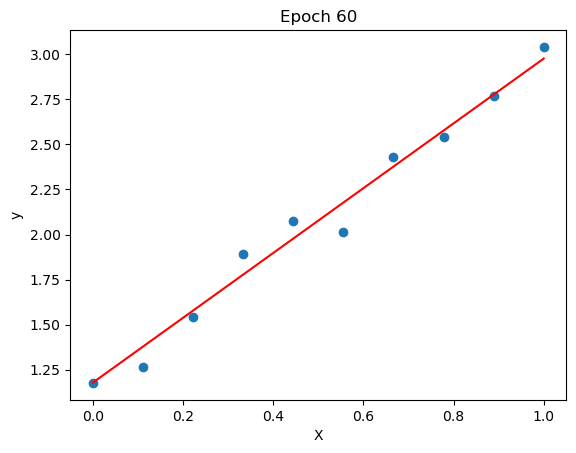

Epoch 61
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 337us/step - loss: 0.0056
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


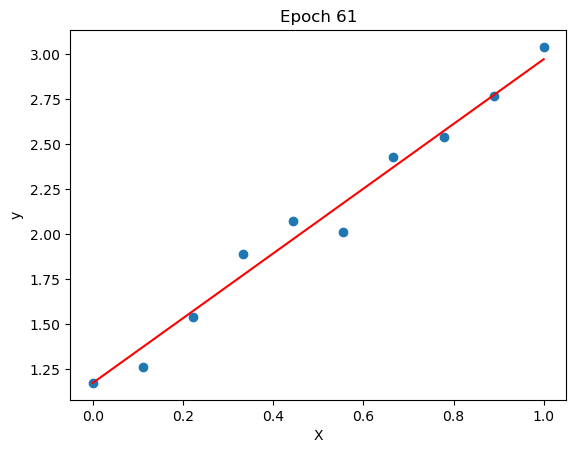

Epoch 62
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 904us/step - loss: 0.0053
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


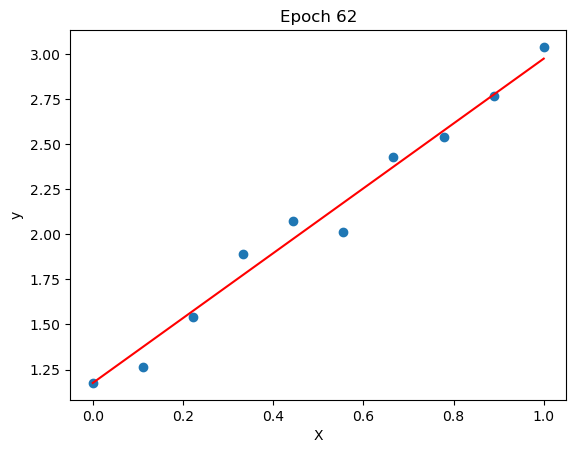

Epoch 63
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step - loss: 0.0096
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


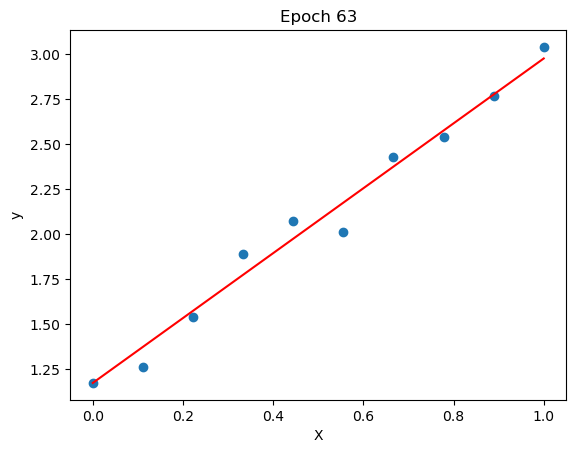

Epoch 64
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 326us/step - loss: 0.0055
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


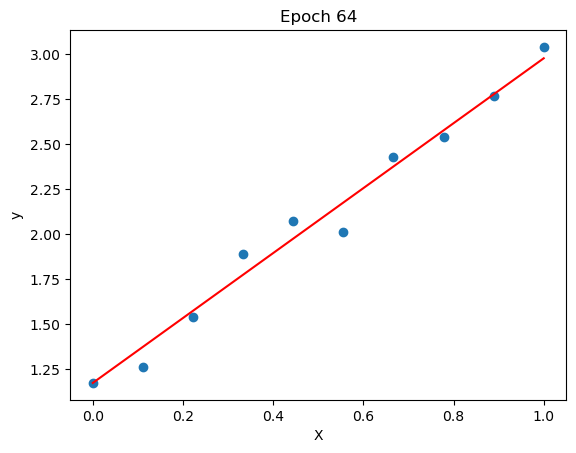

Epoch 65
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 330us/step - loss: 0.0047
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


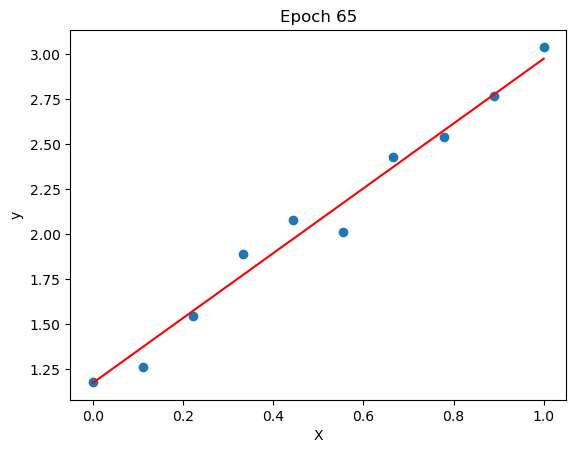

Epoch 66
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 331us/step - loss: 0.0091
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


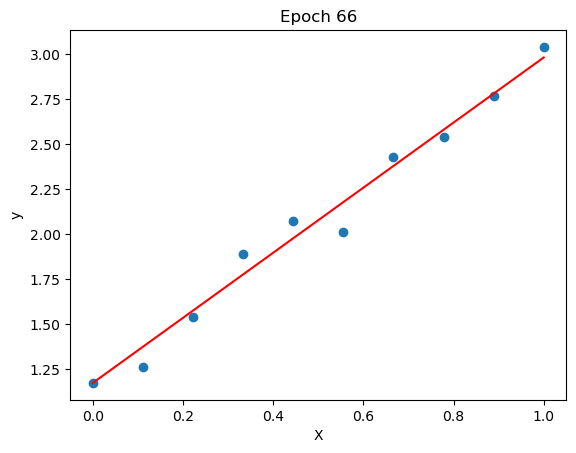

Epoch 67
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 339us/step - loss: 0.0093
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


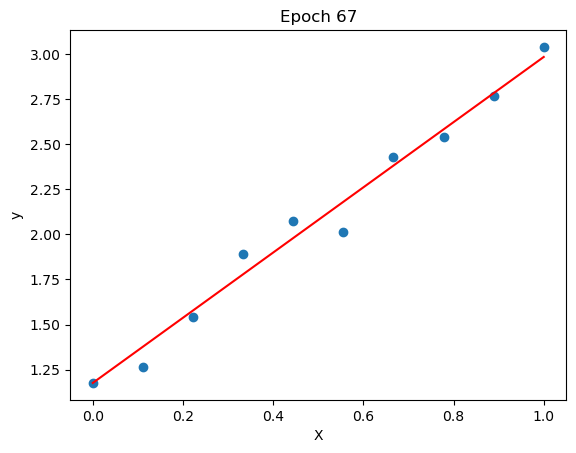

Epoch 68
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 329us/step - loss: 0.0094
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


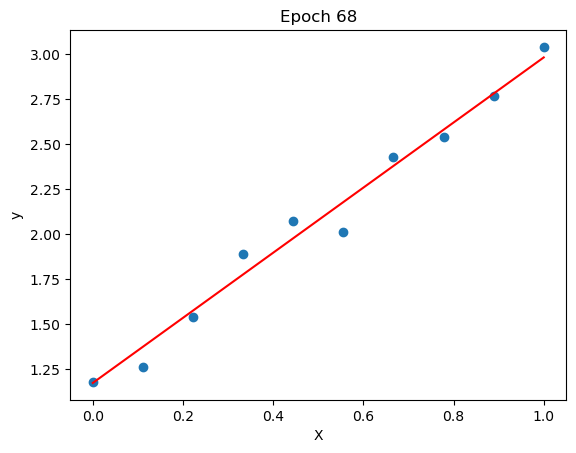

Epoch 69
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 322us/step - loss: 0.0067
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


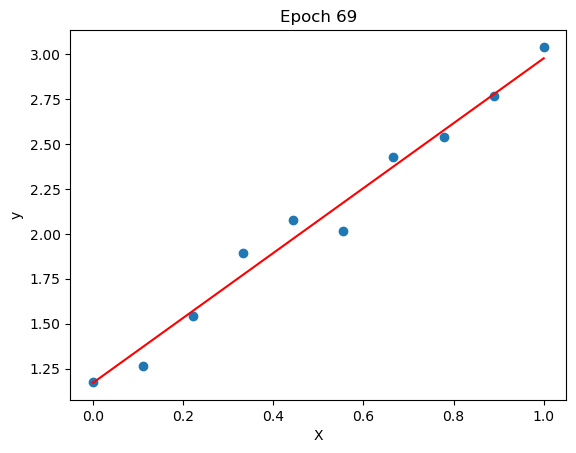

Epoch 70
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 338us/step - loss: 0.0096
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


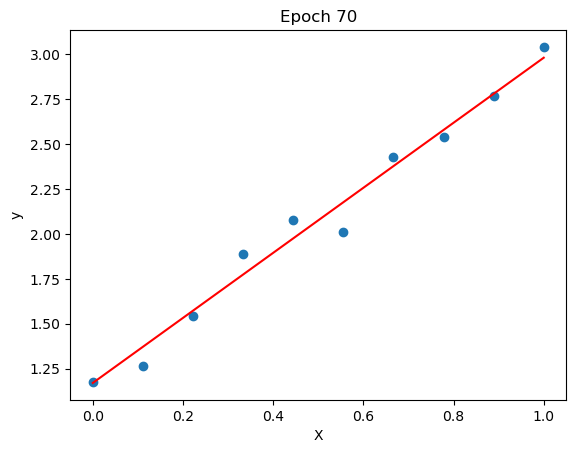

Epoch 71
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step - loss: 0.0079
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


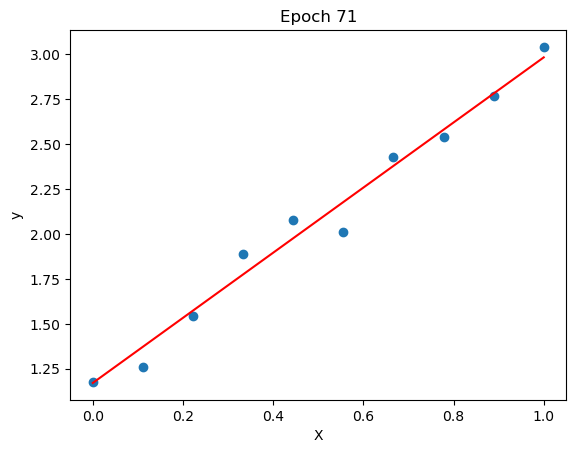

Epoch 72
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step - loss: 0.0056
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


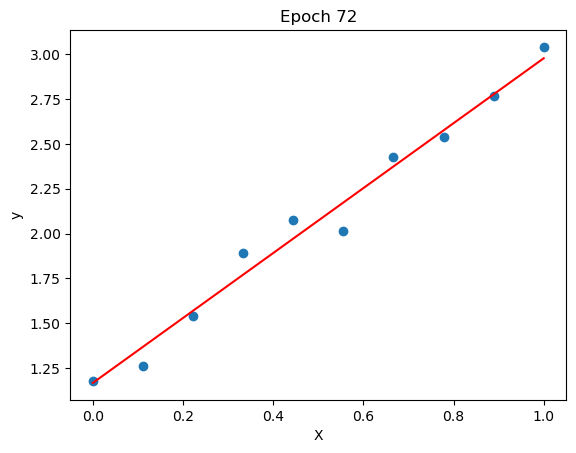

Epoch 73
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step - loss: 0.0106
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


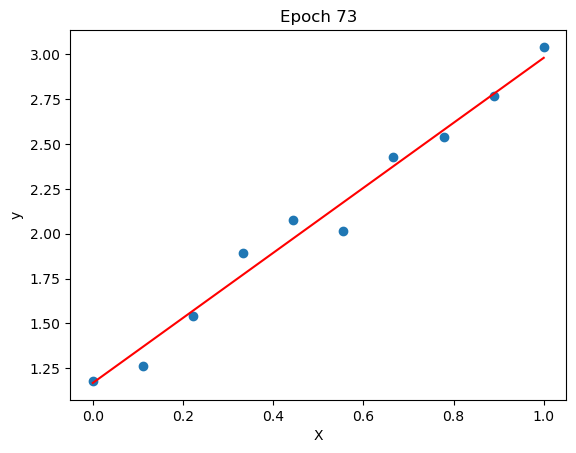

Epoch 74
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 327us/step - loss: 0.0091
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


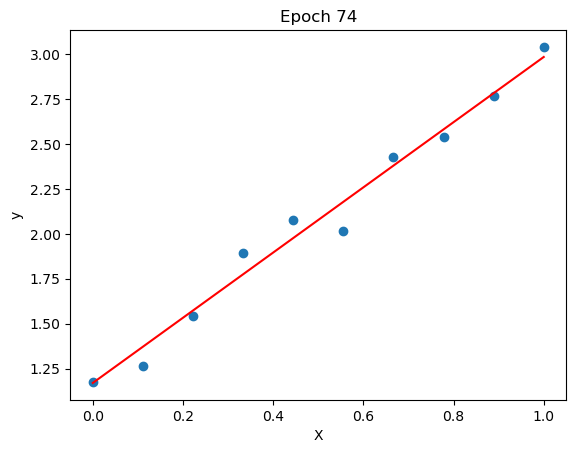

Epoch 75
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 309us/step - loss: 0.0063
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


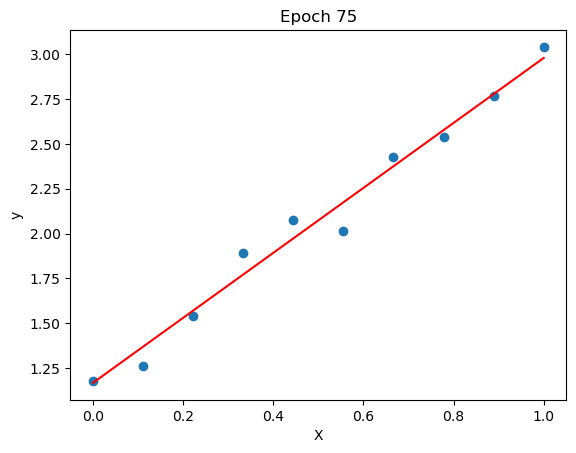

Epoch 76
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step - loss: 0.0072
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


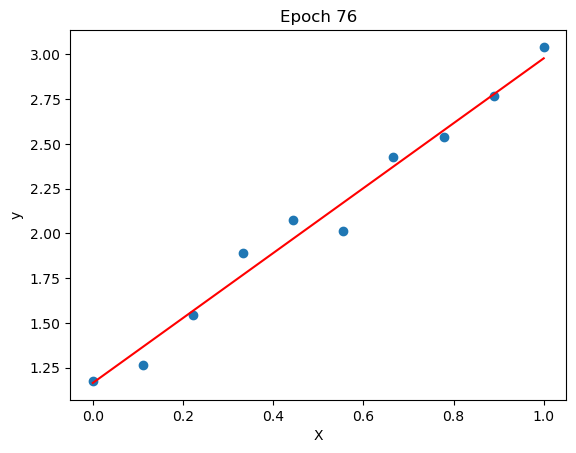

Epoch 77
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 329us/step - loss: 0.0060
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


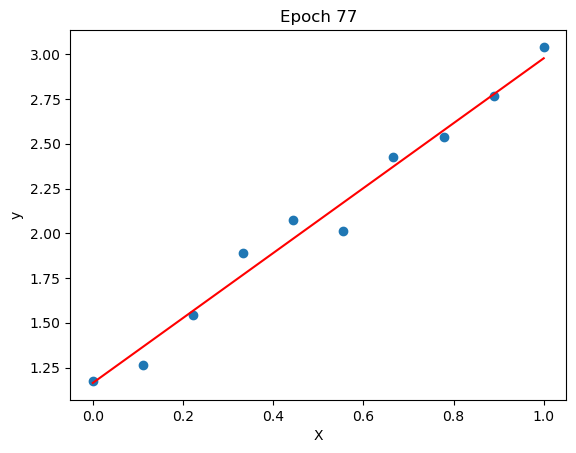

Epoch 78
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step - loss: 0.0065
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


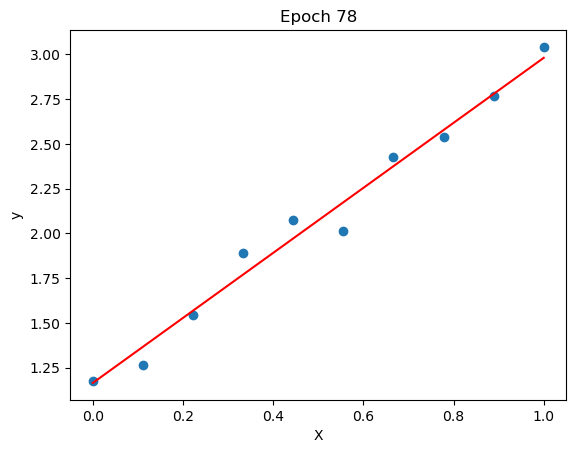

Epoch 79
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 324us/step - loss: 0.0068
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


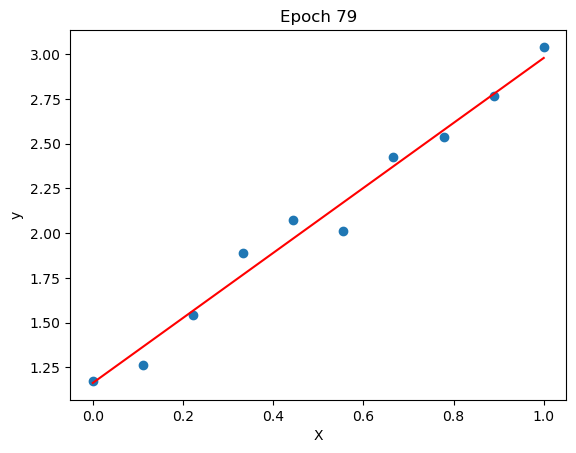

Epoch 80
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 327us/step - loss: 0.0077
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


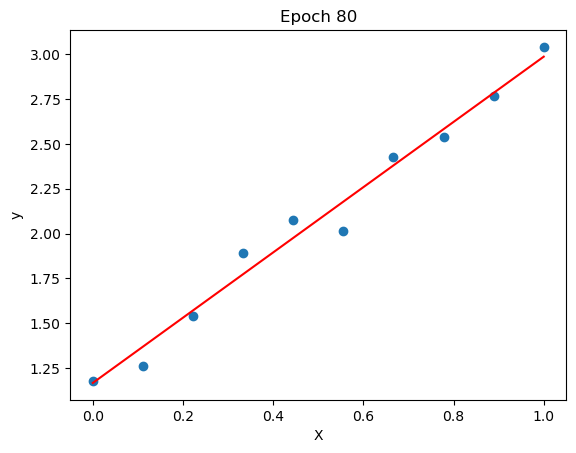

Epoch 81
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 338us/step - loss: 0.0064
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


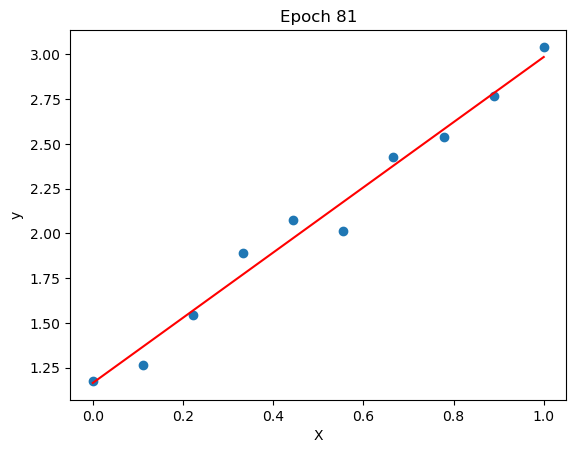

Epoch 82
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 337us/step - loss: 0.0069  
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


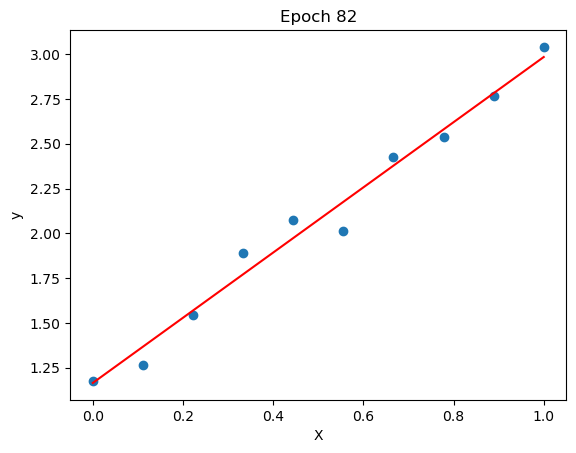

Epoch 83
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 332us/step - loss: 0.0096
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


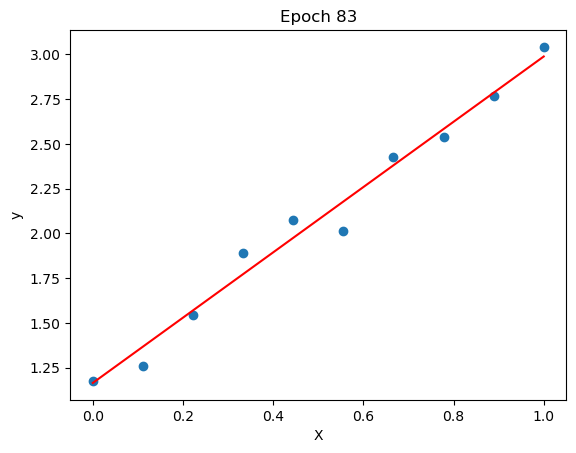

Epoch 84
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step - loss: 0.0047  
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


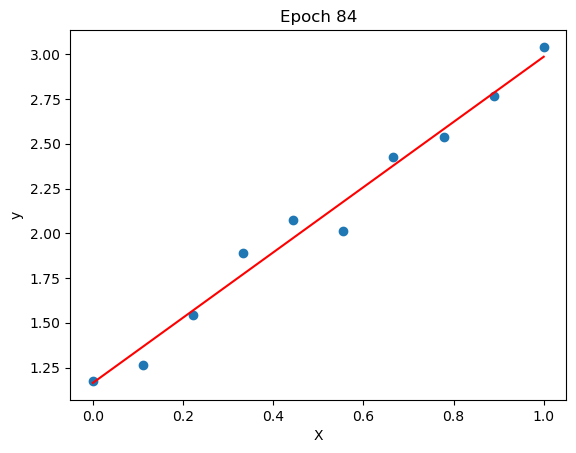

Epoch 85
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 338us/step - loss: 0.0060
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


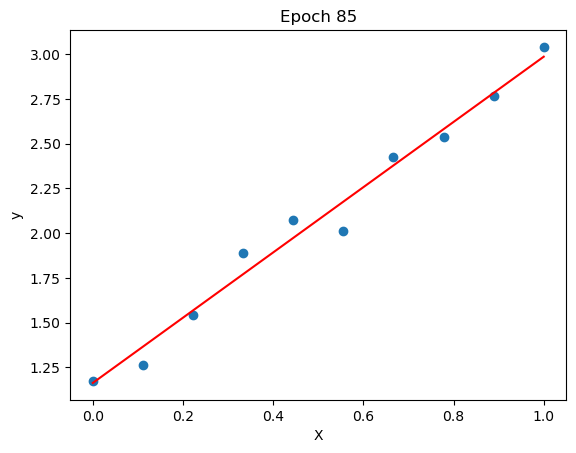

Epoch 86
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step - loss: 0.0060  
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


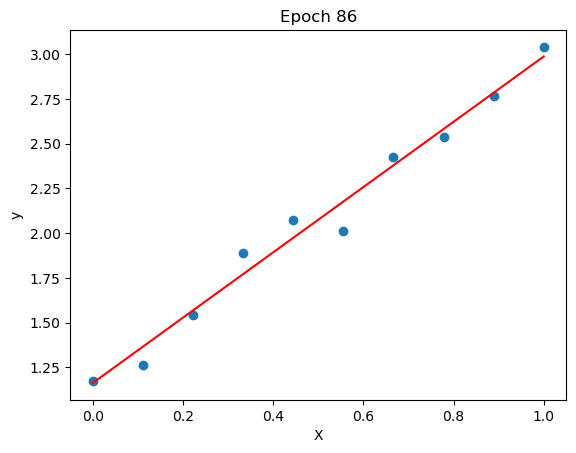

Epoch 87
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 330us/step - loss: 0.0064
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


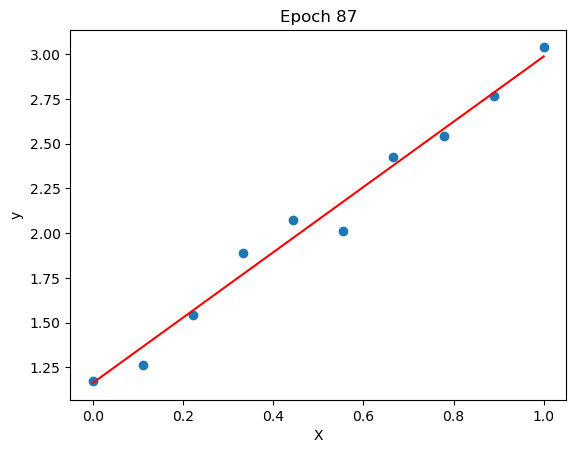

Epoch 88
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 329us/step - loss: 0.0109
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


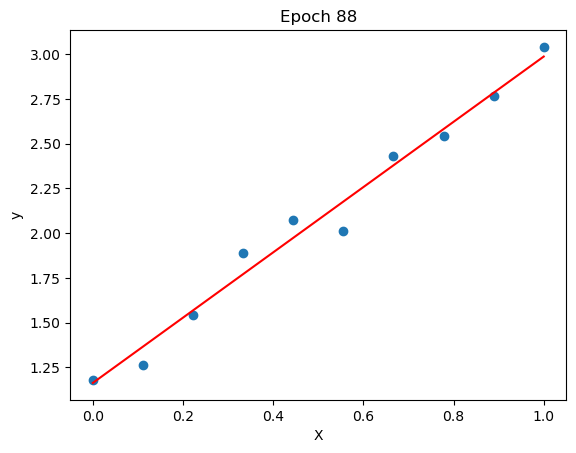

Epoch 89
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step - loss: 0.0079
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


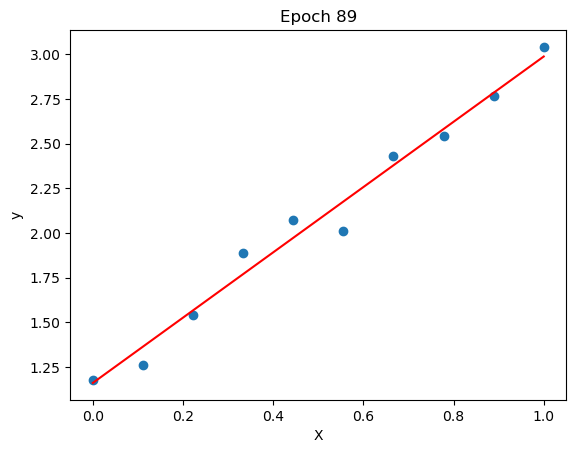

Epoch 90
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 326us/step - loss: 0.0103
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


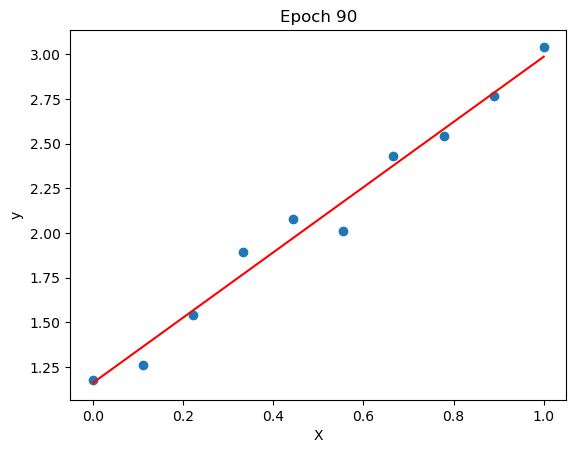

Epoch 91
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 321us/step - loss: 0.0053  
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


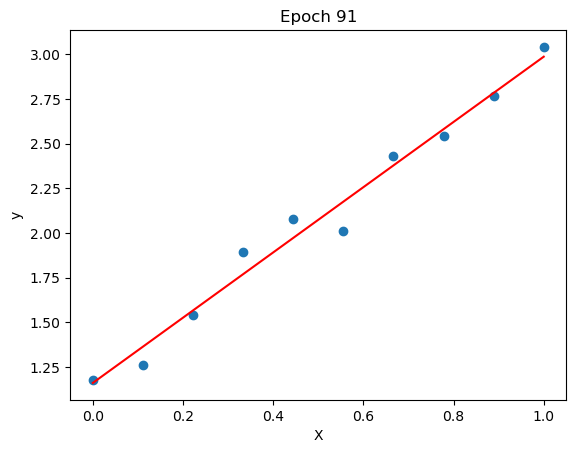

Epoch 92
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step - loss: 0.0065
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


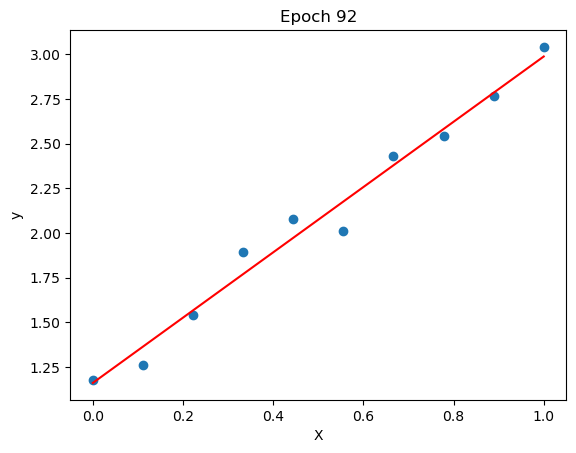

Epoch 93
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 310us/step - loss: 0.0075
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


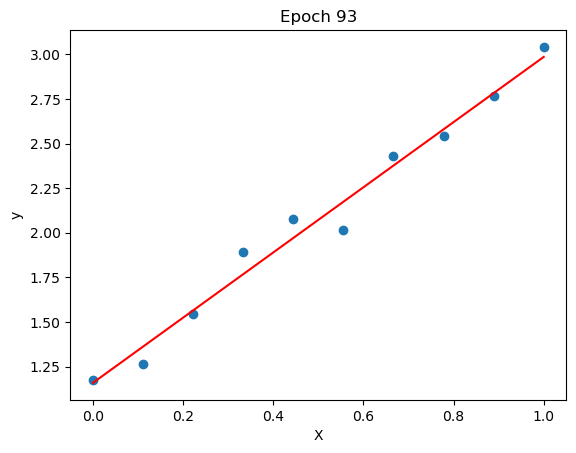

Epoch 94
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step - loss: 0.0076
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


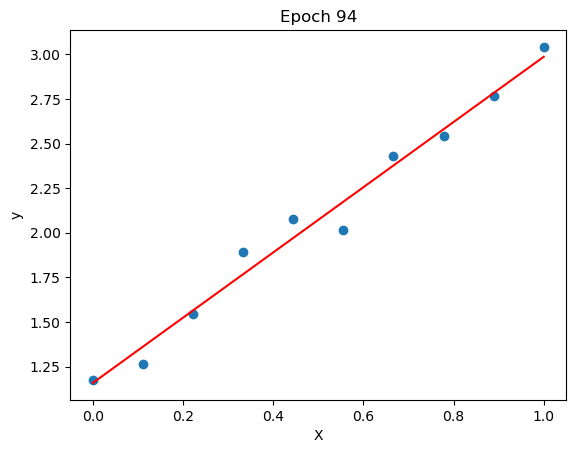

Epoch 95
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 325us/step - loss: 0.0106
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


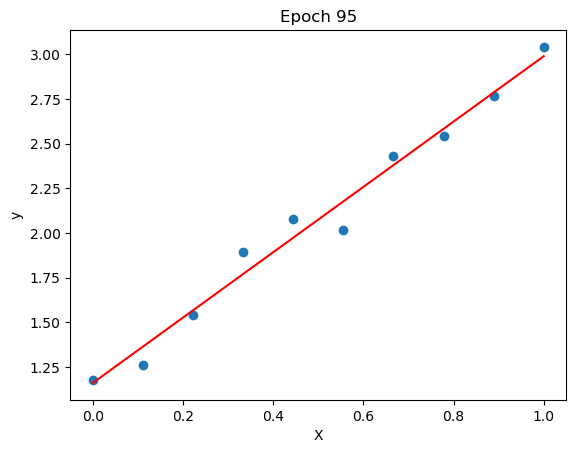

Epoch 96
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 334us/step - loss: 0.0089
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


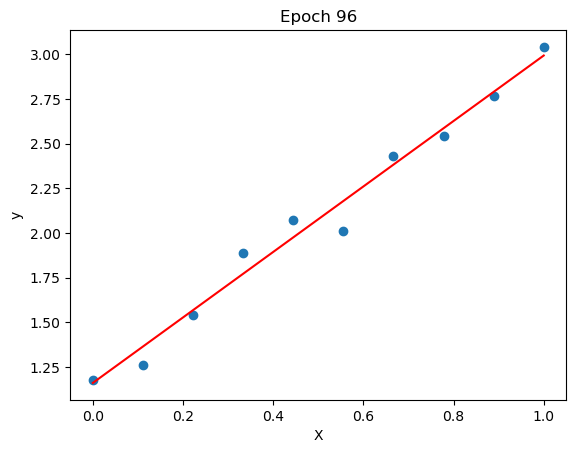

Epoch 97
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 336us/step - loss: 0.0070
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


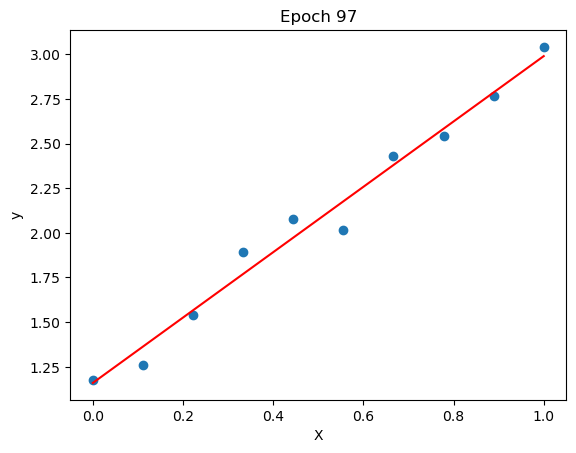

Epoch 98
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 326us/step - loss: 0.0081
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


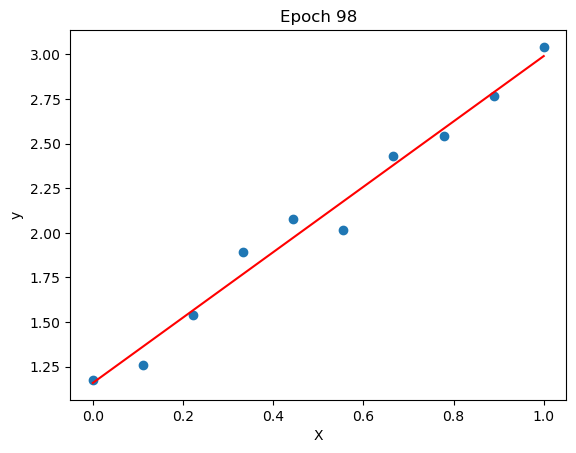

Epoch 99
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 323us/step - loss: 0.0071
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


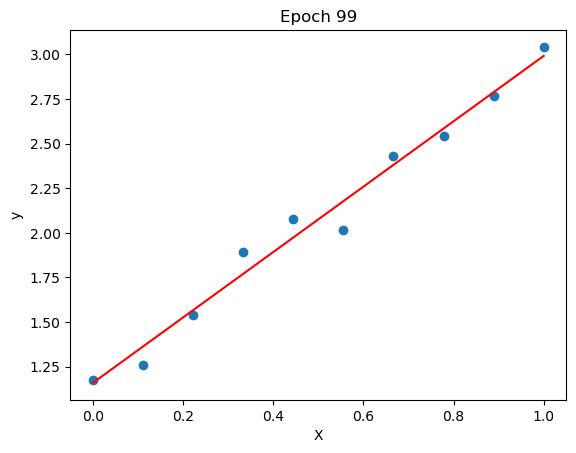

Epoch 100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 336us/step - loss: 0.0062
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


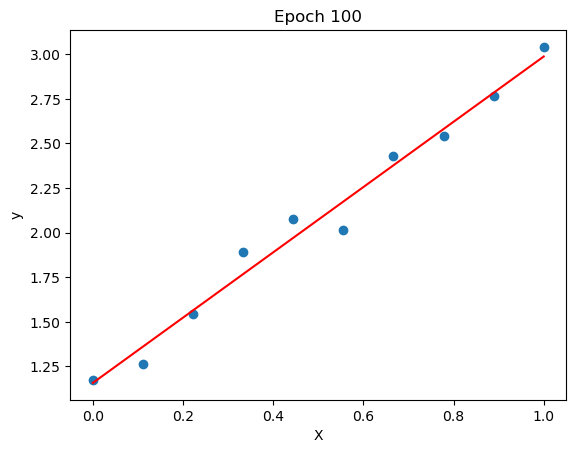

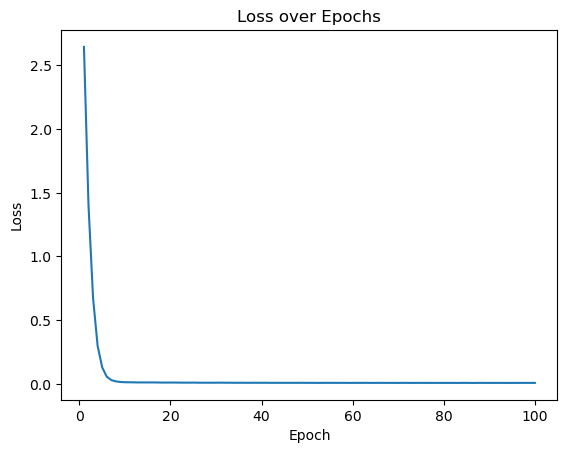

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Creando el dataset
np.random.seed(0)
X = np.linspace(0, 1, 10)
y = 2 * X + 1 + np.random.randn(10) * 0.1  # y = 2x + 1 + error (noise)

# redimensionando para que sea vector columna
X = X.reshape(-1, 1)

# Creando la Red neuronal
model = Sequential()
model.add(Dense(units=4, input_dim=1))  # Linear layer
model.add(Dense(units=1, input_dim=1))

# Compilando
model.compile(optimizer='sgd', loss='mse')

# entrenamiento
losses = []

for epoch in range(100):  # Train para 100 epochs
    print(f"Epoch {epoch + 1}")
    history = model.fit(X, y, epochs=1, batch_size=2, verbose=1)
    losses.append(history.history['loss'][0])

    # graficando línea de regresión
    y_pred = model.predict(X)
    plt.scatter(X, y)
    plt.plot(X, y_pred, color='red')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title(f'Epoch {epoch + 1}')
    plt.show()

# Graficando sobre las epochs
plt.plot(range(1, 101), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.show()
